In [4]:
import pandas as pd
df = pd.read_csv('../data/raw/goibibo_com-travel_sample.csv')
print(df.columns.tolist())

['additional_info', 'address', 'area', 'city', 'country', 'crawl_date', 'guest_recommendation', 'hotel_brand', 'hotel_category', 'hotel_description', 'hotel_facilities', 'hotel_star_rating', 'image_count', 'latitude', 'locality', 'longitude', 'pageurl', 'point_of_interest', 'property_id', 'property_name', 'property_type', 'province', 'qts', 'query_time_stamp', 'review_count_by_category', 'room_area', 'room_count', 'room_facilities', 'room_type', 'similar_hotel', 'site_review_count', 'site_review_rating', 'site_stay_review_rating', 'sitename', 'state', 'uniq_id']


In [5]:
print("DataFrame Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

print("\nDescriptive Statistics:")
print(df.describe())

print("\nFirst 5 Rows:")
print(df.head())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   additional_info           3192 non-null   object 
 1   address                   4000 non-null   object 
 2   area                      3965 non-null   object 
 3   city                      4000 non-null   object 
 4   country                   4000 non-null   object 
 5   crawl_date                4000 non-null   object 
 6   guest_recommendation      2416 non-null   float64
 7   hotel_brand               389 non-null    object 
 8   hotel_category            4000 non-null   object 
 9   hotel_description         3983 non-null   object 
 10  hotel_facilities          3806 non-null   object 
 11  hotel_star_rating         4000 non-null   int64  
 12  image_count               4000 non-null   int64  
 13  latitude                  4000 non-null   float

In [6]:
# Convert date columns to datetime objects
df['crawl_date'] = pd.to_datetime(df['crawl_date'])
df['query_time_stamp'] = pd.to_datetime(df['query_time_stamp'])

# For numerical columns with missing values, let's fill with the median for now.
# This is a simple strategy; more sophisticated methods can be explored later.
for col in ['guest_recommendation', 'site_review_count', 'site_review_rating']:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].median())

# For categorical columns with missing values, let's fill with 'Unknown'.
# 'hotel_brand' has too many missing values, so let's fill it with 'Unknown'
df['hotel_brand'] = df['hotel_brand'].fillna('Unknown')

# For other object type columns with missing values, fill with 'Unknown'
for col in ['additional_info', 'area', 'hotel_description', 'hotel_facilities',
            'locality', 'point_of_interest', 'qts', 'review_count_by_category',
            'room_area', 'room_facilities', 'similar_hotel']:
    if df[col].isnull().any():
        df[col] = df[col].fillna('Unknown')


print("\nUpdated DataFrame Info after handling some missing values:")
df.info()

print("\nUpdated Missing Values counts:")
print(df.isnull().sum())


Updated DataFrame Info after handling some missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   additional_info           4000 non-null   object             
 1   address                   4000 non-null   object             
 2   area                      4000 non-null   object             
 3   city                      4000 non-null   object             
 4   country                   4000 non-null   object             
 5   crawl_date                4000 non-null   datetime64[ns]     
 6   guest_recommendation      4000 non-null   float64            
 7   hotel_brand               4000 non-null   object             
 8   hotel_category            4000 non-null   object             
 9   hotel_description         4000 non-null   object             
 10  hotel_facilities        

Unique Values and Counts for Categorical Features:

--- Column: city ---
Goa          220
Bangalore    170
Delhi        137
Gurgaon      101
Chennai       86
            ... 
Morena         1
Anklesvar      1
Sirmaur        1
Tehri          1
Sambalpur      1
Name: city, Length: 558, dtype: int64


--- Column: state ---
Maharashtra                    456
Karnataka                      372
Kerala                         347
Rajasthan                      329
Tamil Nadu                     271
Himachal Pradesh               222
Goa                            221
Uttarakhand                    203
Uttar Pradesh                  178
Andhra Pradesh                 166
Madhya Pradesh                 159
Gujarat                        155
Haryana                        150
West Bengal                    144
Delhi                          135
Jammu and Kashmir              125
Punjab                          87
Sikkim                          63
Orissa                          44
Bihar        

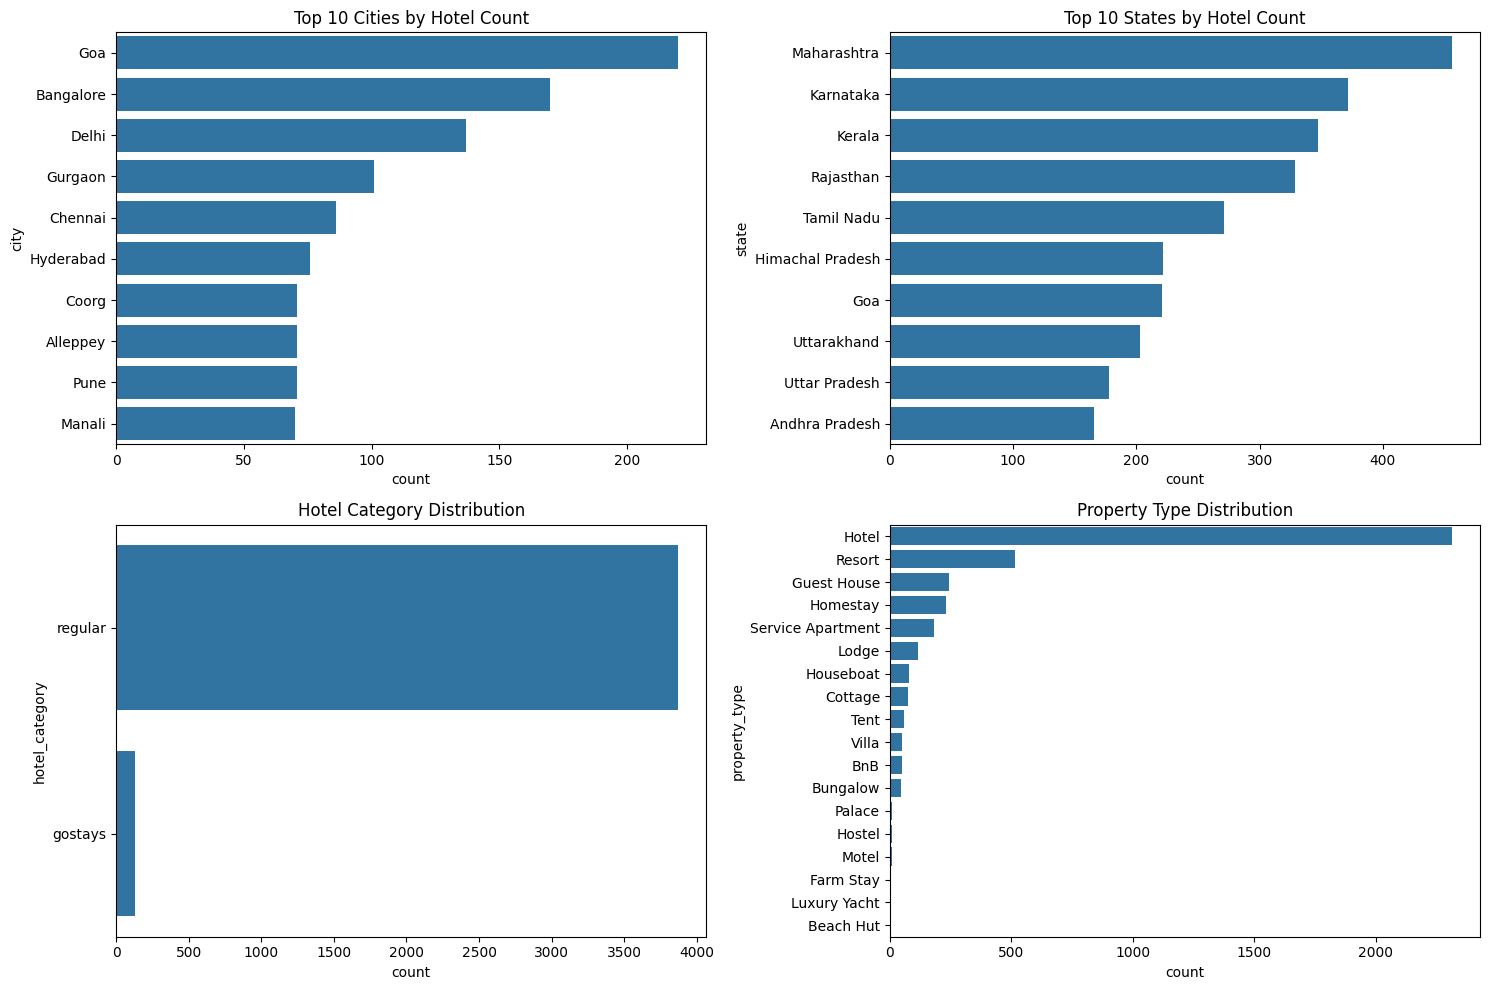


Further analysis will be needed for text/list-like categorical features such as:
- additional_info
- hotel_description
- hotel_facilities
- room_facilities
- point_of_interest
- similar_hotel


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Unique Values and Counts for Categorical Features:\n")

# List of categorical columns to analyze
categorical_cols = [
    'city', 'state', 'country', 'hotel_brand', 'hotel_category',
    'property_type', 'room_type'
]

for col in categorical_cols:
    print(f"--- Column: {col} ---")
    print(df[col].value_counts())
    print("\n")

# Visualizing the top N categories for some columns
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.countplot(y='city', data=df, order=df['city'].value_counts().index[:10])
plt.title('Top 10 Cities by Hotel Count')

plt.subplot(2, 2, 2)
sns.countplot(y='state', data=df, order=df['state'].value_counts().index[:10])
plt.title('Top 10 States by Hotel Count')

plt.subplot(2, 2, 3)
sns.countplot(y='hotel_category', data=df, order=df['hotel_category'].value_counts().index)
plt.title('Hotel Category Distribution')

plt.subplot(2, 2, 4)
sns.countplot(y='property_type', data=df, order=df['property_type'].value_counts().index)
plt.title('Property Type Distribution')

plt.tight_layout()
plt.show()

print("\nFurther analysis will be needed for text/list-like categorical features such as:")
print("- additional_info")
print("- hotel_description")
print("- hotel_facilities")
print("- room_facilities")
print("- point_of_interest")
print("- similar_hotel")


Descriptive Statistics for Numerical Features after Imputation:
       guest_recommendation  hotel_star_rating  image_count     latitude  \
count           4000.000000        4000.000000  4000.000000  4000.000000   
mean              77.304750           1.306000    12.995500    21.288213   
std               17.774106           1.479159    11.631113     7.576905   
min                0.000000           0.000000     0.000000     8.080476   
25%               76.000000           0.000000     6.000000    13.748553   
50%               80.000000           1.000000     9.000000    22.225083   
75%               83.000000           3.000000    17.000000    28.018203   
max              100.000000           5.000000   129.000000    79.608077   

         longitude   room_count  site_review_count  site_review_rating  
count  4000.000000  4000.000000        4000.000000          4000.00000  
mean     77.432995    22.200250          35.582500             3.81000  
std       4.506588    96.132138

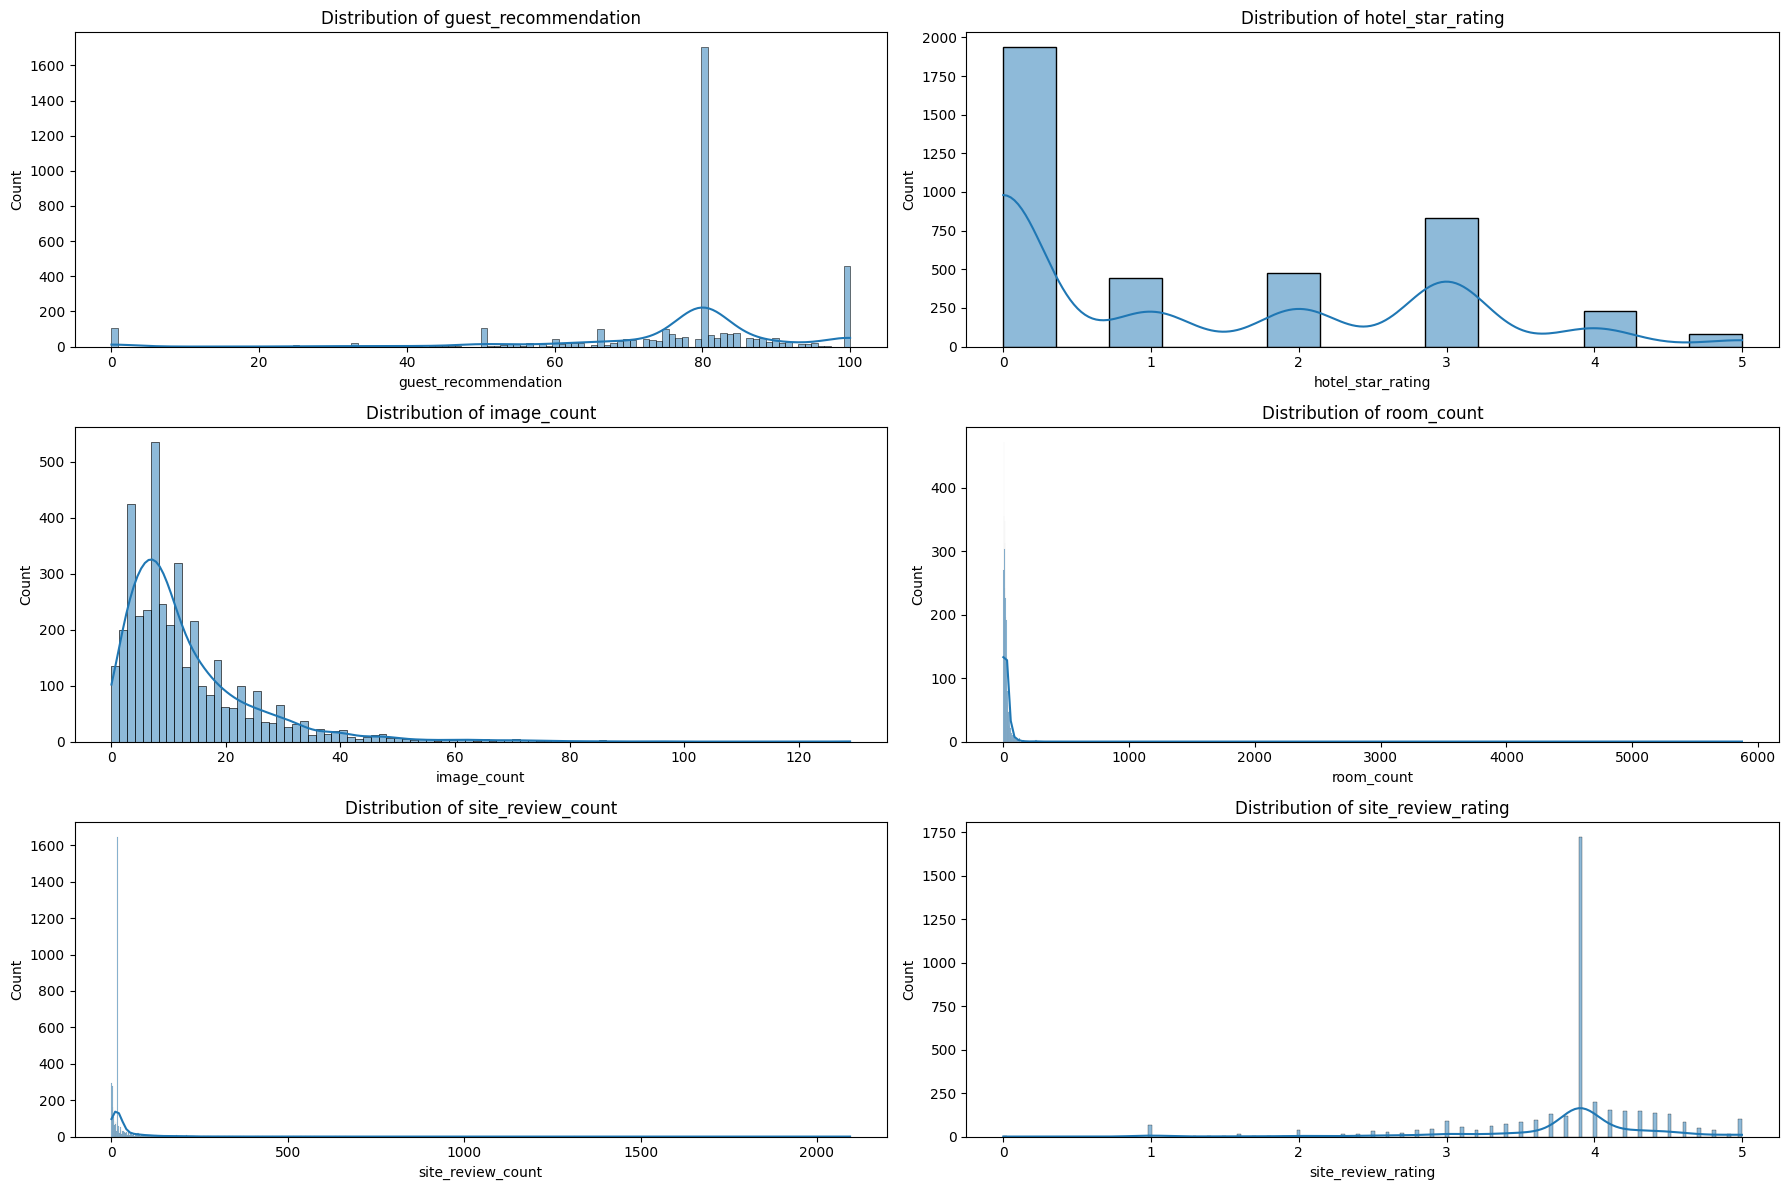

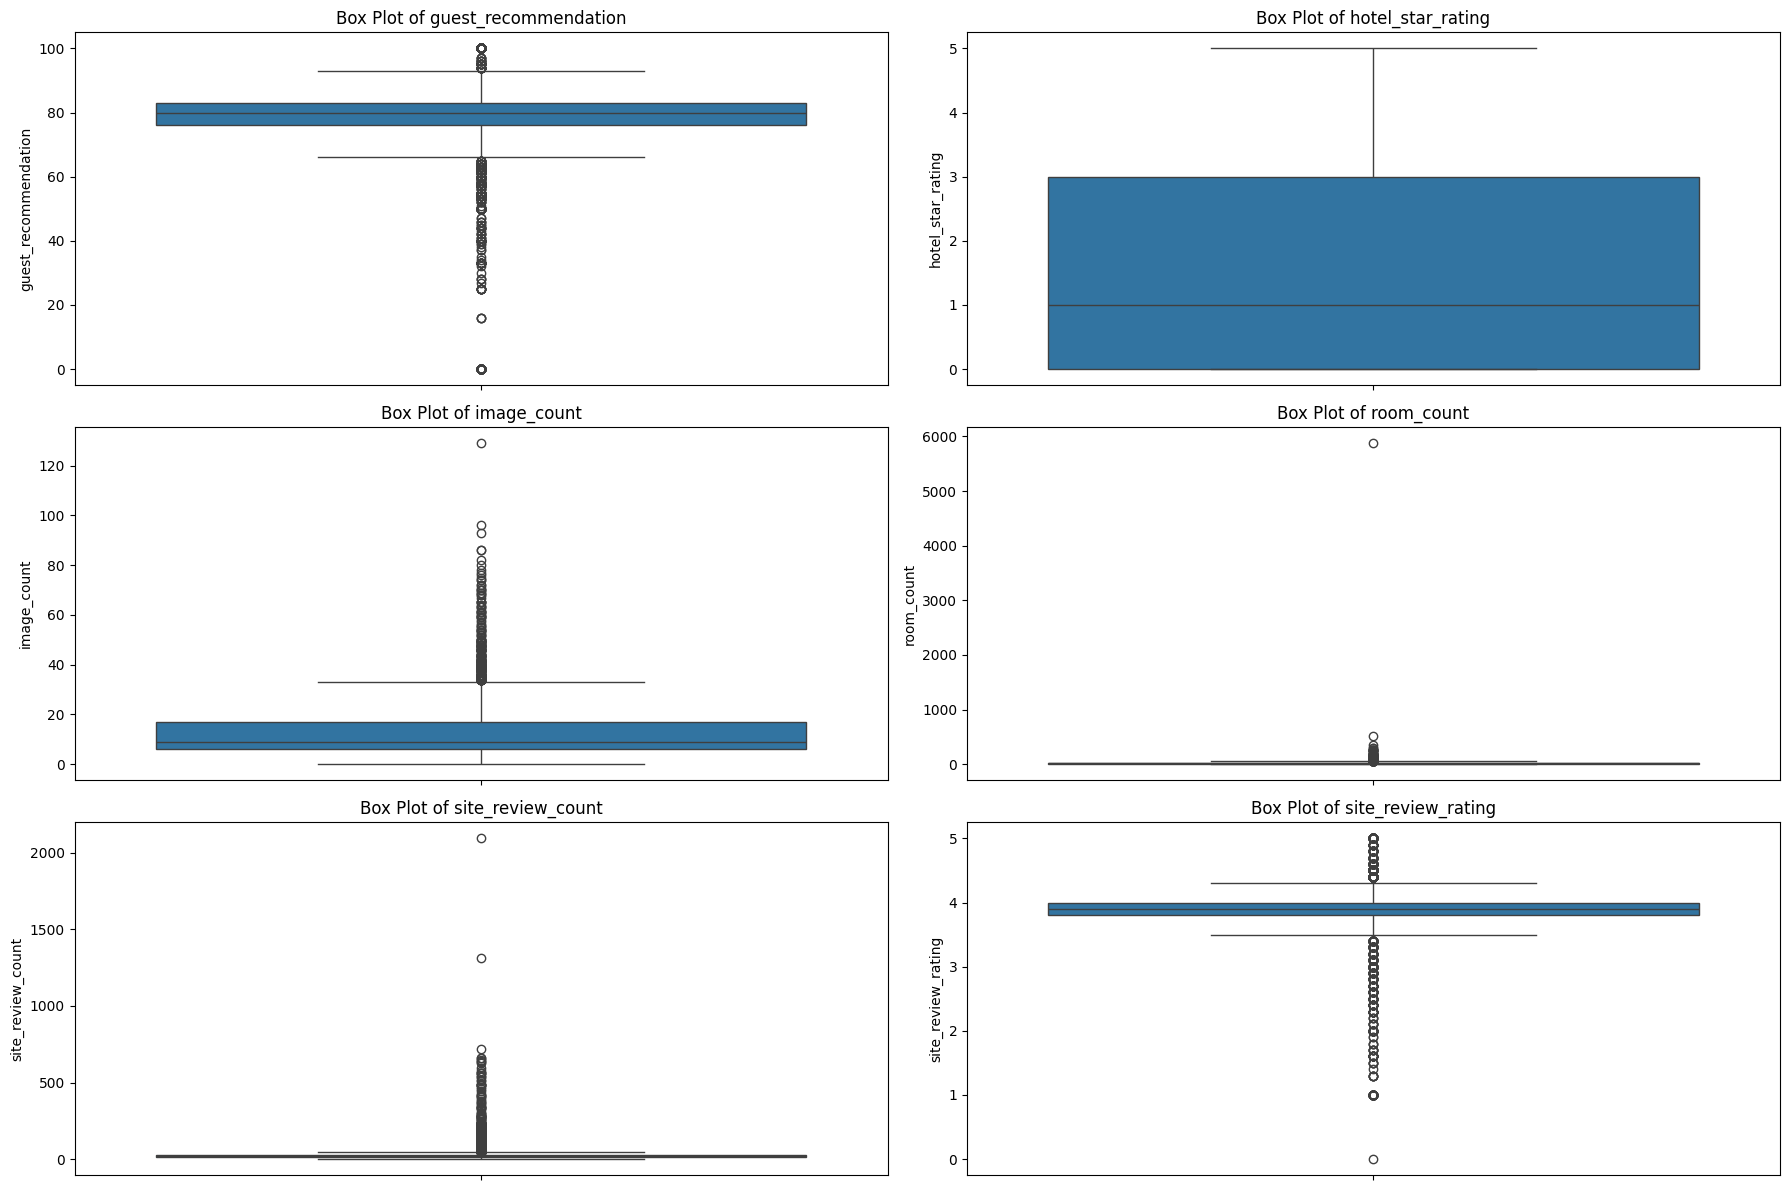

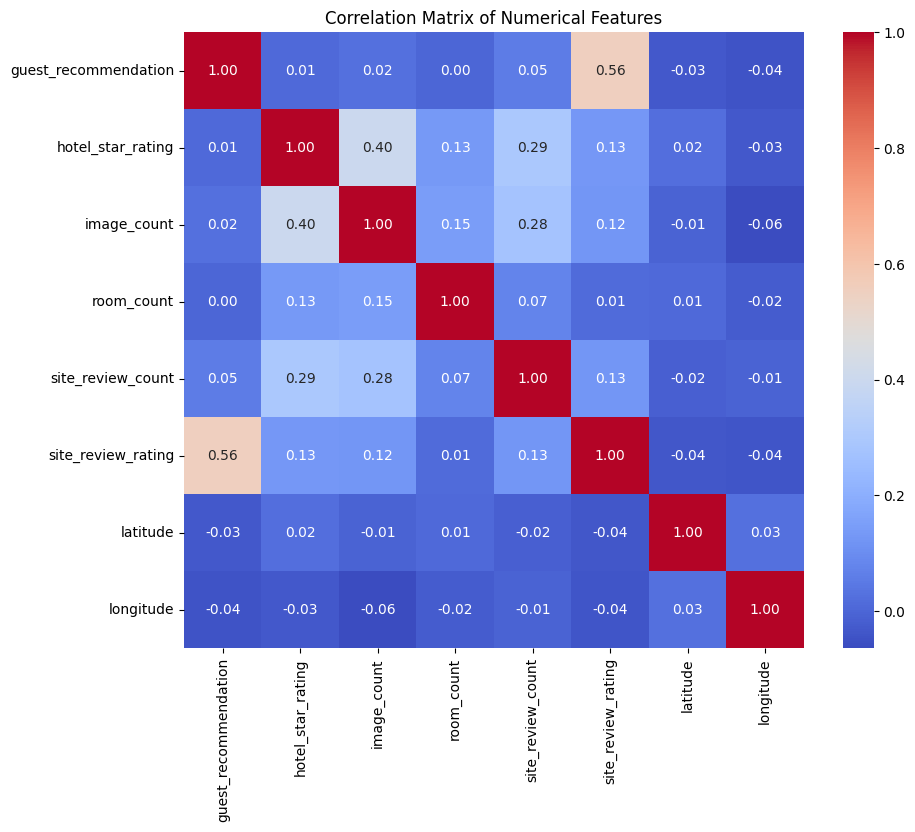

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\nDescriptive Statistics for Numerical Features after Imputation:")
print(df[['guest_recommendation', 'hotel_star_rating', 'image_count',
          'latitude', 'longitude', 'room_count', 'site_review_count',
          'site_review_rating']].describe())

# Visualizing Distributions of Numerical Features
numerical_cols = ['guest_recommendation', 'hotel_star_rating', 'image_count',
                  'room_count', 'site_review_count', 'site_review_rating']

plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Box plots to identify outliers
plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

# Correlation Matrix
plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_cols + ['latitude', 'longitude']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()